In [91]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as st
import warnings
warnings.filterwarnings('ignore')
import os   

In [2]:
from google.colab import files
uploaded = files.upload()

Saving WA_Fn-UseC_-HR-Employee-Attrition[1].csv to WA_Fn-UseC_-HR-Employee-Attrition[1].csv


In [3]:
import io
df = pd.read_csv(io.BytesIO(uploaded['WA_Fn-UseC_-HR-Employee-Attrition[1].csv']))
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [4]:
df.shape

(1470, 35)

In [5]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [6]:
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [7]:
##checking null values


In [8]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [9]:
##no null values

In [10]:
df['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

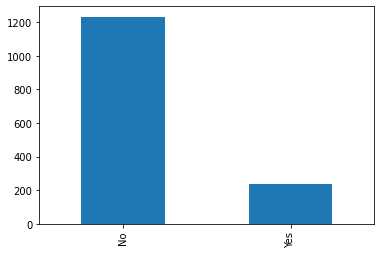

In [11]:
df['Attrition'].value_counts().plot.bar()

In [12]:
##data is imbalanced

In [13]:
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [14]:
x = df.drop('Attrition',axis=1)
y = df['Attrition']

In [15]:
os = RandomOverSampler()

In [16]:
x_res,y_res = os.fit_resample(x,y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [17]:
x_res.shape , y_res.shape

((2466, 34), (2466,))

In [18]:
x.shape , y.shape

((1470, 34), (1470,))

In [19]:
print('Original dataset shape {}'.format(Counter(y)))
print('Resample dataset shape {}'.format(Counter(y_res)))

Original dataset shape Counter({'No': 1233, 'Yes': 237})
Resample dataset shape Counter({'Yes': 1233, 'No': 1233})


In [20]:
x2 = pd.DataFrame(x_res,columns=x.columns)
x2.shape

(2466, 34)

In [21]:
y2 = pd.DataFrame(y_res,columns=['Attrition'])

In [22]:
y2

,Attrition
0,Yes
1,No
2,Yes
3,No
4,No
...,...
2461,Yes
2462,Yes
2463,Yes
2464,Yes


In [23]:
df2 = pd.concat((x2,y2),axis=1)
df2.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5,Yes
1,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7,No
2,37,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0,Yes
3,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0,No
4,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2,No


In [24]:
df2.shape

(2466, 35)

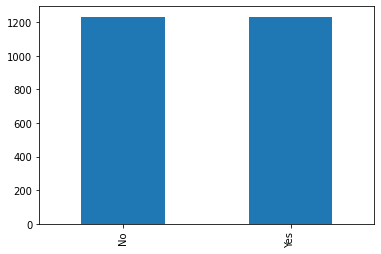

In [25]:
df2['Attrition'].value_counts().plot.bar()

In [26]:
## now the data is balanced

In [27]:
## univariate analysis

In [28]:
df2['Age'].nunique()

43

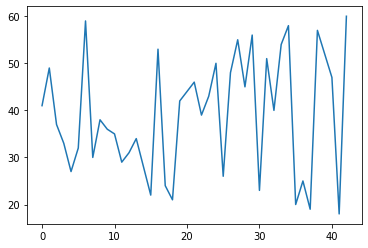

In [29]:
pd.Series(df2['Age'].unique()).plot()

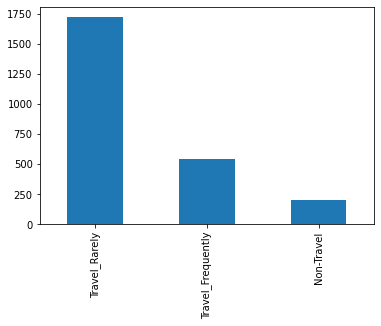

In [30]:
df2['BusinessTravel'].value_counts().plot.bar()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


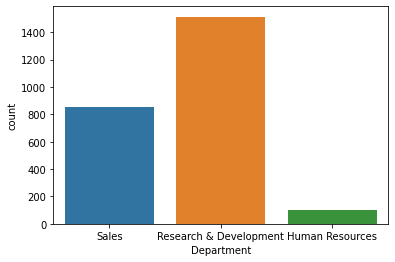

In [31]:
sns.countplot(df2['Department'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


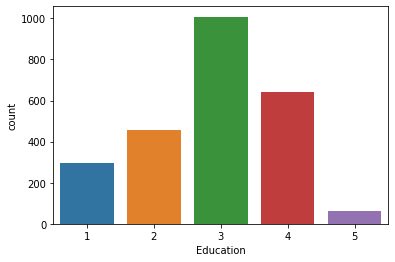

In [32]:
sns.countplot(df2['Education'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


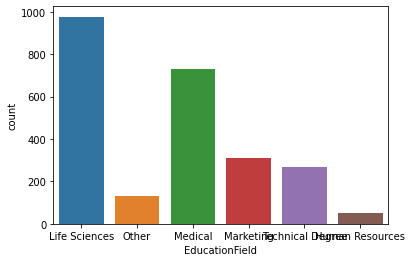

In [33]:
sns.countplot(df2['EducationField'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


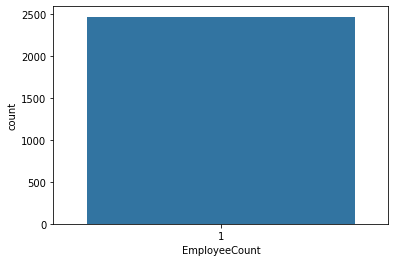

In [34]:
sns.countplot(df2['EmployeeCount']) ##can be dropped

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


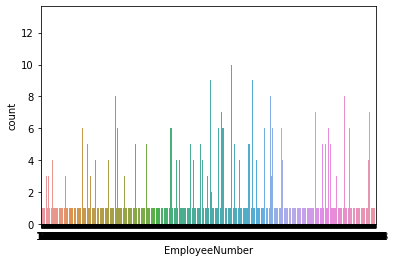

In [35]:
sns.countplot(df2['EmployeeNumber'])

In [36]:
df2['EmployeeNumber'].value_counts()  ## this can also be dropped

118     13
1747    11
970     10
1165    10
190     10
        ..
1296     1
1297     1
1298     1
1301     1
2048     1
Name: EmployeeNumber, Length: 1470, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


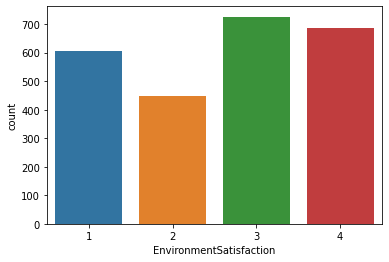

In [37]:
sns.countplot(df2['EnvironmentSatisfaction'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


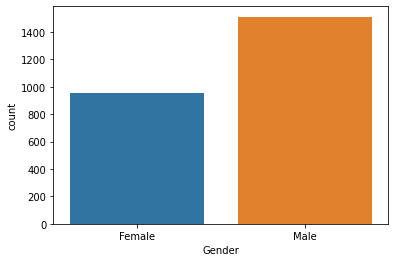

In [38]:
sns.countplot(df2['Gender'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


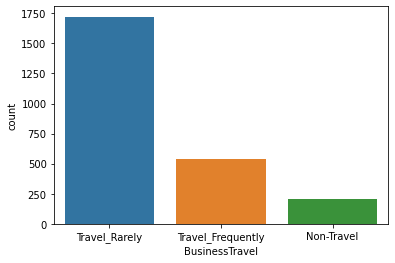

In [39]:
sns.countplot(df2['BusinessTravel'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


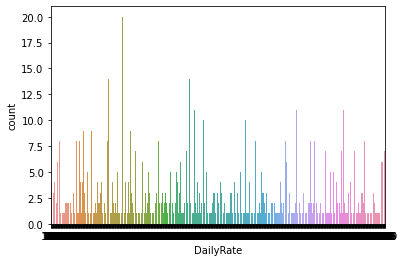

In [40]:
sns.countplot(df2['DailyRate']) ##continuous variable 

In [41]:
df2['Over18'].value_counts() ##dis can be dropped

Y    2466
Name: Over18, dtype: int64

In [42]:
df2['StandardHours'].value_counts()  ##dis too can dropped

80    2466
Name: StandardHours, dtype: int64

In [43]:
df2.drop(['Over18','StandardHours','EmployeeNumber','EmployeeCount'],axis=1,inplace=True)

In [44]:
df2.shape

(2466, 31)

In [45]:
## encoding the variables using Label Encoder

In [46]:
from sklearn.preprocessing import LabelEncoder

In [47]:
def encode(df,col):
  le = LabelEncoder()
  df[col] = pd.DataFrame(le.fit_transform(df[col]))


In [48]:
encode(df2,'BusinessTravel')

In [49]:
encode(df2,'Department')

In [50]:
encode(df2,'EducationField')

In [51]:
encode(df2,'Gender')

In [52]:
encode(df2,'JobRole')

In [53]:
encode(df2,'MaritalStatus')

In [54]:
encode(df2,'Attrition')

In [55]:
encode(df2,'OverTime')

In [56]:
df2.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,41,2,1102,2,1,2,1,2,0,94,3,2,7,4,2,5993,19479,8,1,11,3,1,0,8,0,1,6,4,0,5,1
1,49,1,279,1,8,1,1,3,1,61,2,2,6,2,1,5130,24907,1,0,23,4,4,1,10,3,3,10,7,1,7,0
2,37,2,1373,1,2,2,4,4,1,92,2,1,2,3,2,2090,2396,6,1,15,3,2,0,7,3,3,0,0,0,0,1
3,33,1,1392,1,3,4,1,4,0,56,3,1,6,3,1,2909,23159,1,1,11,3,3,0,8,3,3,8,7,3,0,0
4,27,2,591,1,2,1,3,1,1,40,3,1,2,2,1,3468,16632,9,0,12,3,4,1,6,3,3,2,2,2,2,0


In [73]:
x3 = df2.drop('Attrition',axis=1)
y3 = df2['Attrition']
df3 = df2.copy()

In [61]:
## will be using pca for dimensionality reduction
## remove outliers
## remove skewness
## scale the data
## model building

In [62]:
from sklearn.decomposition import PCA

In [63]:
test_pca = PCA()
x_pca = test_pca.fit(x3)

In [64]:
x_pca.explained_variance_ratio_

array([7.24436011e-01, 2.73238129e-01, 2.31635742e-03, 5.91269907e-06,
       1.11140405e-06, 9.94687363e-07, 5.97002155e-07, 2.00362563e-07,
       1.74741467e-07, 9.24594427e-08, 8.00288605e-08, 7.00936971e-08,
       5.68053702e-08, 4.48631756e-08, 2.74547558e-08, 2.34421078e-08,
       1.82836148e-08, 1.79601571e-08, 1.68408646e-08, 1.49784468e-08,
       1.35095422e-08, 8.21242638e-09, 7.33799007e-09, 5.69596419e-09,
       3.40050611e-09, 3.29333461e-09, 2.73872572e-09, 2.10922350e-09,
       1.23421511e-09, 7.06671776e-10])

In [67]:
var_cum = np.cumsum(x_pca.explained_variance_ratio_)*100
var_cum

array([ 72.4436011 ,  99.76741402,  99.99904977,  99.99964104,
        99.99975218,  99.99985164,  99.99991134,  99.99993138,
        99.99994886,  99.9999581 ,  99.9999661 ,  99.99997311,
        99.99997879,  99.99998328,  99.99998603,  99.99998837,
        99.9999902 ,  99.99999199,  99.99999368,  99.99999518,
        99.99999653,  99.99999735,  99.99999808,  99.99999865,
        99.99999899,  99.99999932,  99.99999959,  99.99999981,
        99.99999993, 100.        ])

In [69]:
k = np.argmax(var_cum>90)
k

1

In [70]:
## one feature is retaining 72% of data

In [71]:
## selecting features based on correlation

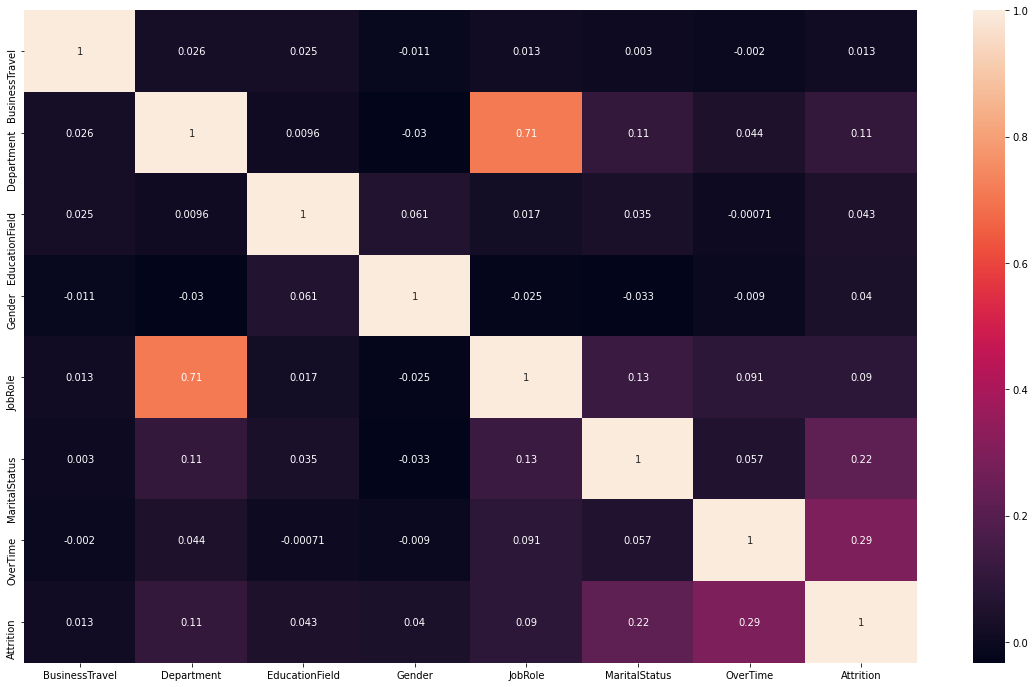

In [76]:
plt.figure(figsize=(20,12))
sns.heatmap(df2.corr(),annot=True)

In [77]:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [83]:
correlation(df3,0.7)   ## department and job role are 70% correlated ...hence one of them can be dropped 

{'JobRole'}

In [84]:
df3.drop('JobRole',axis=1,inplace=True)

In [85]:
## handling outliers

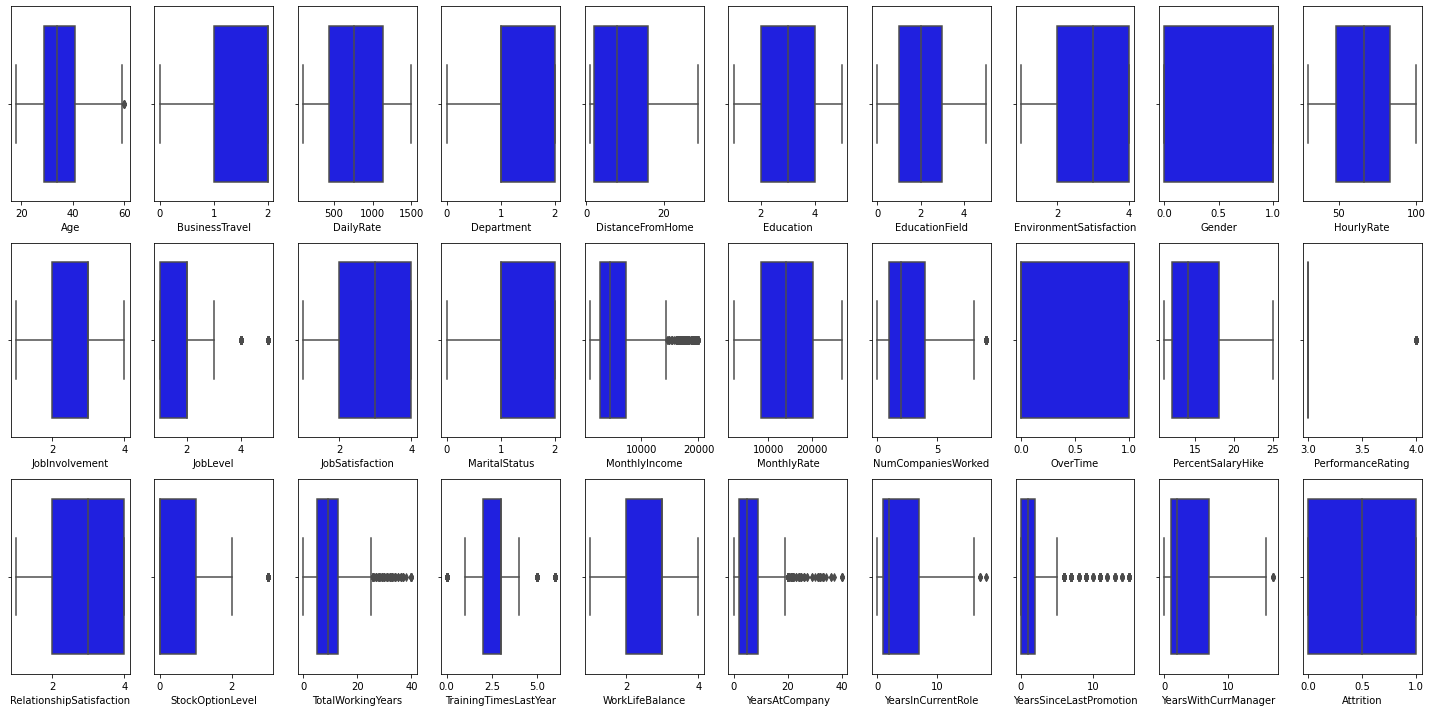

In [99]:
cols = df3.columns
plt.figure(figsize=(20,10))
for i in range(len(cols)):
  plt.subplot(3,10,i+1)
  sns.boxplot(df3[cols[i]],color='blue',orient='v')
  plt.tight_layout()

In [150]:
df4 = df3.astype('float')
df4.dtypes

Age                         float64
BusinessTravel              float64
DailyRate                   float64
Department                  float64
DistanceFromHome            float64
Education                   float64
EducationField              float64
EnvironmentSatisfaction     float64
Gender                      float64
HourlyRate                  float64
JobInvolvement              float64
JobLevel                    float64
JobSatisfaction             float64
MaritalStatus               float64
MonthlyIncome               float64
MonthlyRate                 float64
NumCompaniesWorked          float64
OverTime                    float64
PercentSalaryHike           float64
PerformanceRating           float64
RelationshipSatisfaction    float64
StockOptionLevel            float64
TotalWorkingYears           float64
TrainingTimesLastYear       float64
WorkLifeBalance             float64
YearsAtCompany              float64
YearsInCurrentRole          float64
YearsSinceLastPromotion     

In [139]:
## outliers are present in many features

In [151]:
from scipy.stats import zscore
z = np.abs(zscore(df4))
len(np.where(z>3)[0])


184

In [141]:
## also finding outliers using iqr

In [142]:
def outlier(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    df_out=(df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))
    return(df_out.sum())     

In [143]:
outlier(df3)

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

In [144]:
# not showing any significant outliers

In [145]:
def lower(df,col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower=Q1 - 1.5 * IQR
    return lower

def upper(df,col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    upper=Q3 + 1.5 * IQR
    return upper

def remove_outlier(df,col):
    for i in range(df.shape[0]):
        if (df[col].iloc[i])>upper(df,col):
            df[col].iloc[i]=upper(df,col)
        elif (df[col].iloc[i])<lower(df,col):
            df[col].iloc[i]=lower(df,col)

In [146]:
remove_outlier(df3,'MonthlyIncome')

In [152]:
df5 = df4[(z<3).all(axis=1)]
df5.shape

(2352, 30)

In [153]:
df4.shape

(2466, 30)

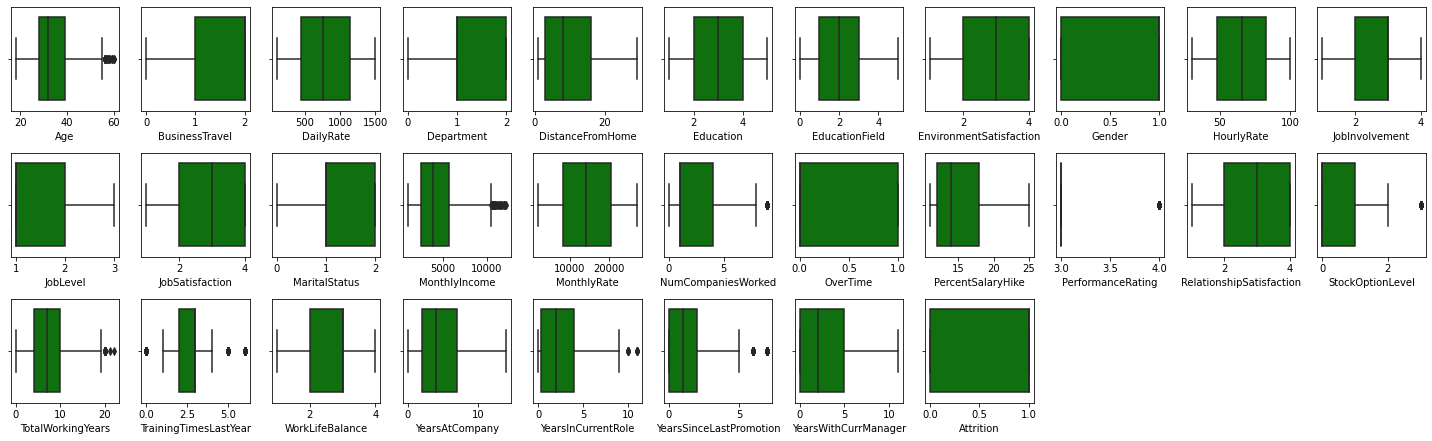

In [179]:
cols=df7.columns.values
plt.figure(figsize=(20,20))
for i in range(len(cols)):
    plt.subplot(10,11,i+1)
    sns.boxplot(df8[cols[i]], color='green', orient='v')
    plt.tight_layout()

In [166]:
## most of the ouliers are removed

In [155]:
z1 = np.abs(zscore(df5))
len(np.where(z1>3)[0])


190

In [160]:
df6 = df5[(z1<3).all(axis=1)]
df6.shape

(2195, 30)

In [173]:
z2 = np.abs(zscore(df6))
len(np.where(z2>3)[0])
df7 = df6[(z2<3).all(axis=1)]

In [177]:
z3 = np.abs(zscore(df7))
len(np.where(z3>3)[0])
df8 = df7[(z3<3).all(axis=1)]

In [181]:
z4 = np.abs(zscore(df8))
len(np.where(z4>3)[0])
df9 = df8[(z4<3).all(axis=1)]

In [182]:
df9.shape, df8.shape, df7.shape, df6.shape , df5.shape , df4.shape , df3.shape

((2024, 30),
 (2038, 30),
 (2095, 30),
 (2195, 30),
 (2352, 30),
 (2466, 30),
 (2466, 30))

In [184]:
##outliers are removed

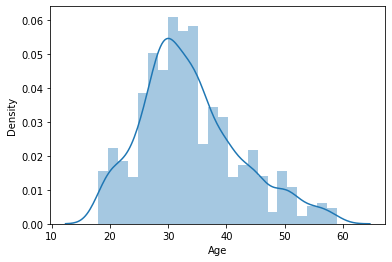

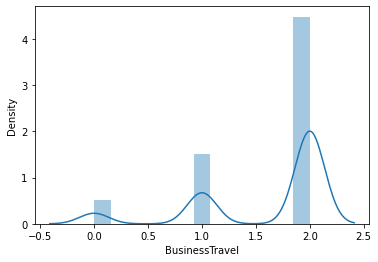

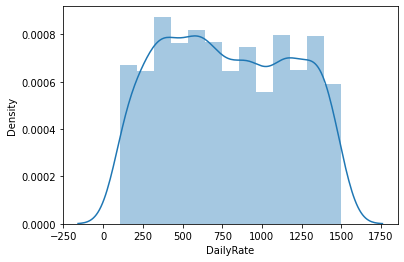

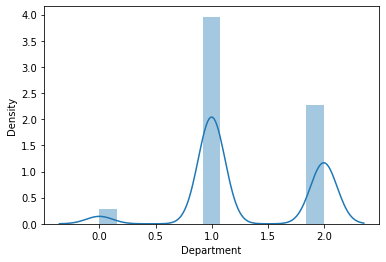

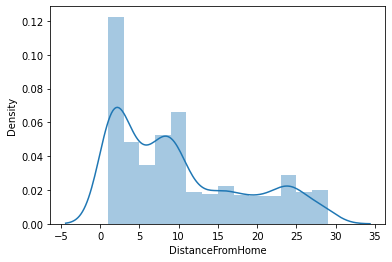

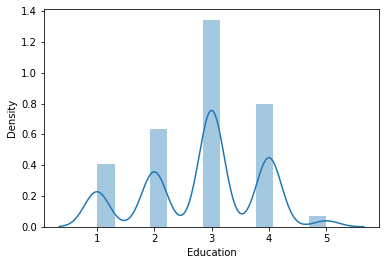

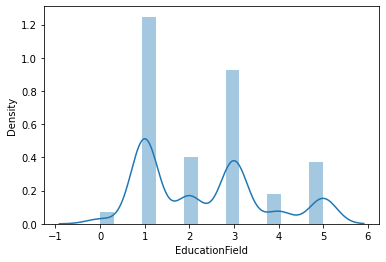

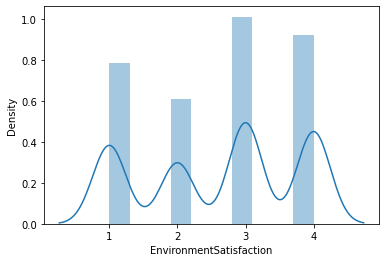

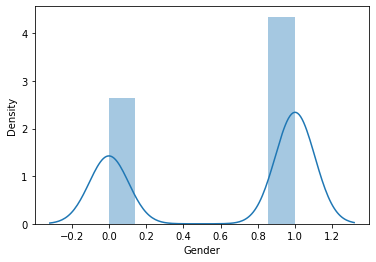

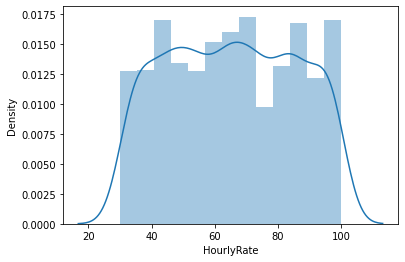

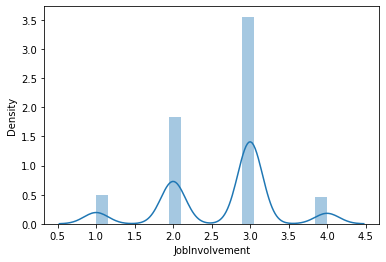

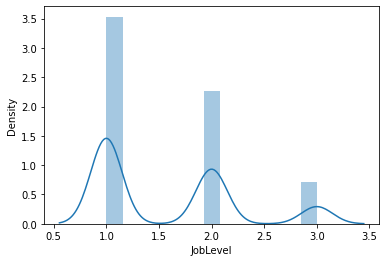

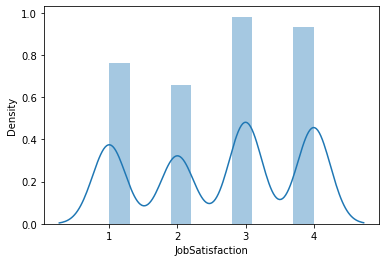

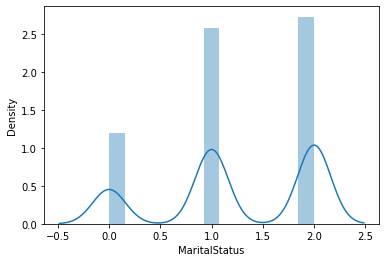

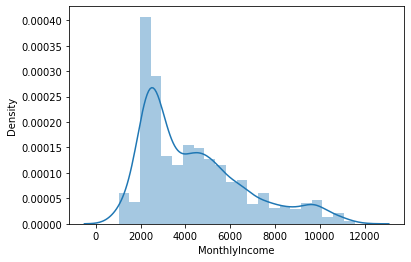

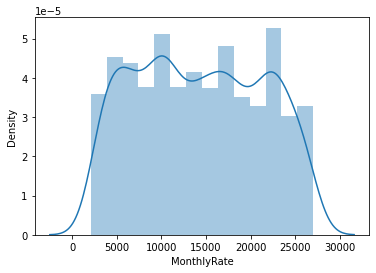

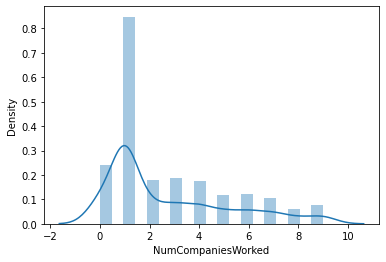

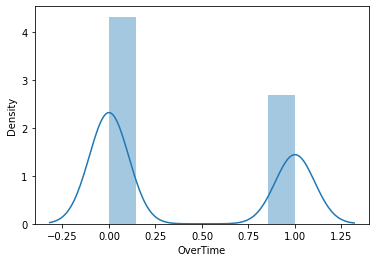

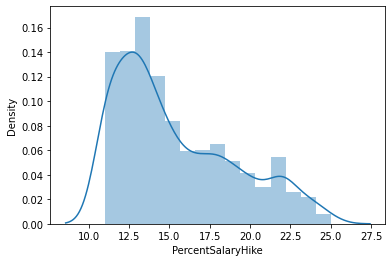

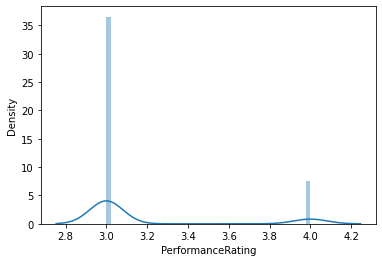

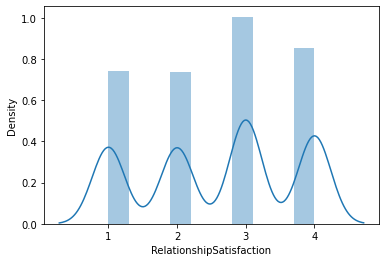

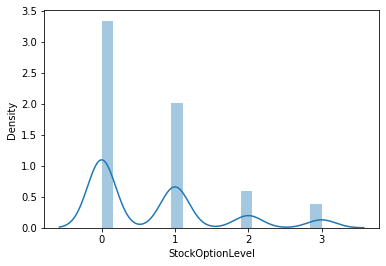

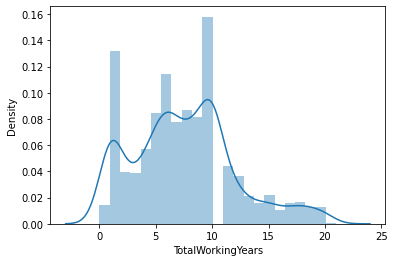

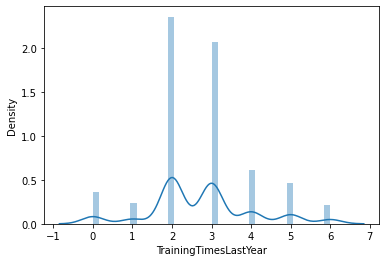

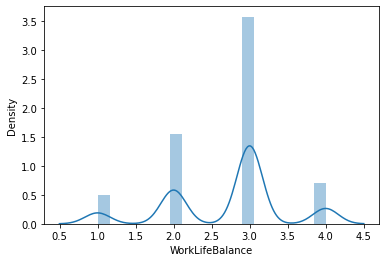

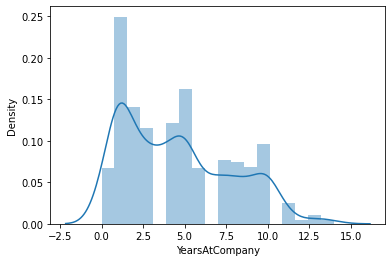

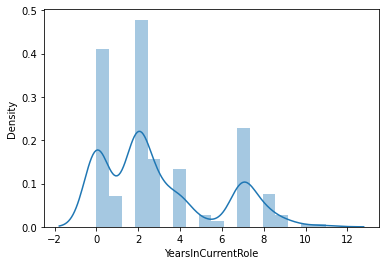

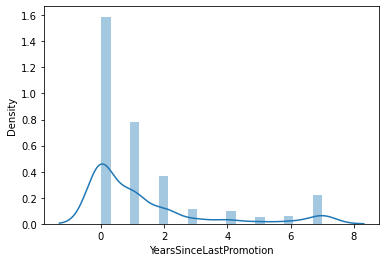

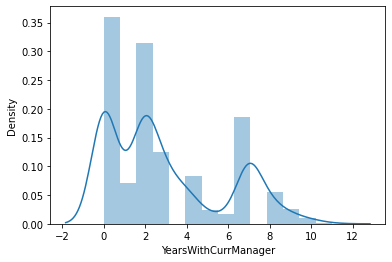

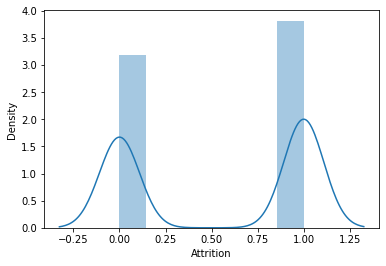

In [185]:
for i in df9.columns:
  plt.subplots()
  sns.distplot(df9[i])

In [186]:
## most of the features are skewed ..will handle it later 

In [187]:
df9.skew()

Age                         0.630651
BusinessTravel             -1.377865
DailyRate                   0.065018
Department                  0.027631
DistanceFromHome            0.751467
Education                  -0.304342
EducationField              0.533899
EnvironmentSatisfaction    -0.219248
Gender                     -0.501571
HourlyRate                  0.011450
JobInvolvement             -0.490210
JobLevel                    0.798467
JobSatisfaction            -0.203750
MaritalStatus              -0.408202
MonthlyIncome               0.974557
MonthlyRate                 0.062649
NumCompaniesWorked          1.017786
OverTime                    0.479983
PercentSalaryHike           0.766777
PerformanceRating           1.758712
RelationshipSatisfaction   -0.154246
StockOptionLevel            1.188995
TotalWorkingYears           0.510762
TrainingTimesLastYear       0.362035
WorkLifeBalance            -0.506804
YearsAtCompany              0.552626
YearsInCurrentRole          0.780827
Y

In [188]:
## building models

In [189]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score

In [192]:
def get_score(m,x,y,rs=45):
    x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.25,random_state=rs,stratify=y)
    m.fit(x_train,y_train)
    train_score=m.score(x_train,y_train)
    pred=m.predict(x_test)
    test_score=accuracy_score(pred,y_test)
    return train_score,test_score

In [219]:
def get_metric(m,x,y,rs=45):
    x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.25,random_state=rs,stratify=y)
    m.fit(x_train,y_train)
    pred=m.predict(x_test)
    acc=print(accuracy_score(pred,y_test))
    conf=print(confusion_matrix(pred,y_test))
    clas=print(classification_report(pred,y_test))
    return acc,conf,clas

In [194]:
from sklearn.model_selection import GridSearchCV
def gridcvc(m,p,x,y):
    gkb=GridSearchCV(m,p,n_jobs=-1,cv=5,scoring='accuracy')
    gkb.fit(x,y)
    return gkb.best_params_


from sklearn.model_selection import RandomizedSearchCV
def randomcvc(m,p,x,y):
    from sklearn.model_selection import RandomizedSearchCV
    gkb=RandomizedSearchCV(estimator=m,param_distributions=p,
                          cv=5,n_iter=100,scoring='accuracy',
                          n_jobs=-1, verbose=5,return_train_score=True,random_state=45)
    gkb.fit(x,y)
    return gkb.best_params_

In [196]:
def cross(m,x,y,c=5):
    score=cross_val_score(m,x,y,cv=c,n_jobs=-1)
    return (score.mean(), score.std())

In [197]:
x9 = df9.drop('Attrition',axis=1)
y9 = df9['Attrition']

In [198]:
lrc=LogisticRegression(random_state=45,n_jobs=-1)
dtc=DecisionTreeClassifier(random_state=45)
svc=SVC(random_state=45)
knnc=KNeighborsClassifier(n_jobs=-1)
rfc=RandomForestClassifier(n_jobs=-1,random_state=45)
gbc=GradientBoostingClassifier(random_state=45)
xgbc=XGBClassifier(n_jobs=-1,random_state=45)
adac=AdaBoostClassifier(random_state=45)
gnb=GaussianNB()
mnb=MultinomialNB()

In [199]:
print("LR ", get_score(lrc,x9,y9))
print("DT ", get_score(dtc,x9,y9))
print("SVC ", get_score(svc,x9,y9))
print("KNN ", get_score(knnc,x9,y9))
print("GNB ", get_score(gnb,x9,y9))
print("MNB ", get_score(mnb,x9,y9))
print("RF ", get_score(rfc,x9,y9))
print("GB ", get_score(gbc,x9,y9))
print("XGB ", get_score(xgbc,x9,y9))

LR  (0.6357048748353096, 0.6205533596837944)
DT  (1.0, 0.924901185770751)
SVC  (0.5658761528326746, 0.5711462450592886)
KNN  (0.8300395256916996, 0.7944664031620553)
GNB  (0.7299077733860343, 0.7035573122529645)
MNB  (0.5592885375494071, 0.567193675889328)
RF  (1.0, 0.9664031620553359)
GB  (0.953227931488801, 0.8972332015810277)
XGB  (0.9374176548089591, 0.883399209486166)


In [201]:
## boosting models are giving good results

In [203]:
print(cross(rfc,x9,y9,c=5))
print(cross(gbc,x9,y9,c=5))
print(cross(xgbc,x9,y9,c=5))

(0.9777716660554944, 0.008106975109949309)
(0.9026732673267326, 0.016689737231398744)
(0.8942794279427944, 0.026806321051889324)


In [206]:
## all the boosting models are giving good cross val score

In [205]:
##lets scaled the model and then check results

In [211]:
from sklearn.preprocessing import MinMaxScaler
def scaled(x):
    scx=MinMaxScaler()
    xs=pd.DataFrame(scx.fit_transform(x), columns=x.columns)
    return xs


In [212]:
x9_s = scaled(x9)

In [213]:
print("LR ", get_score(lrc,x9_s,y9))
print("DT ", get_score(dtc,x9_s,y9))
print("SVC ", get_score(svc,x9_s,y9))
print("KNN ", get_score(knnc,x9_s,y9))
print("GNB ", get_score(gnb,x9_s,y9))
print("MNB ", get_score(mnb,x9_s,y9))
print("RF ", get_score(rfc,x9_s,y9))
print("GB ", get_score(gbc,x9_s,y9))
print("XGB ", get_score(xgbc,x9_s,y9))

LR  (0.7760210803689065, 0.7450592885375494)
DT  (1.0, 0.924901185770751)
SVC  (0.9321475625823452, 0.8596837944664032)
KNN  (0.8913043478260869, 0.8241106719367589)
GNB  (0.7299077733860343, 0.7114624505928854)
MNB  (0.7140974967061924, 0.7193675889328063)
RF  (1.0, 0.9683794466403162)
GB  (0.953227931488801, 0.8972332015810277)
XGB  (0.9374176548089591, 0.883399209486166)


In [214]:
##scaling has improved the accuracy significantly

In [221]:
get_metric(rfc,x9_s,y9,rs=45) ##randomforestclassifier

0.9683794466403162
[[215   1]
 [ 15 275]]
              precision    recall  f1-score   support

         0.0       0.93      1.00      0.96       216
         1.0       1.00      0.95      0.97       290

    accuracy                           0.97       506
   macro avg       0.97      0.97      0.97       506
weighted avg       0.97      0.97      0.97       506



(None, None, None)

In [223]:
get_metric(gbc,x9_s,y9,rs=45) ##gradientboosting

0.8972332015810277
[[196  18]
 [ 34 258]]
              precision    recall  f1-score   support

         0.0       0.85      0.92      0.88       214
         1.0       0.93      0.88      0.91       292

    accuracy                           0.90       506
   macro avg       0.89      0.90      0.90       506
weighted avg       0.90      0.90      0.90       506



(None, None, None)

In [226]:
get_metric(xgbc,x9_s,y9,rs=45) #xgboost

0.883399209486166
[[194  23]
 [ 36 253]]
              precision    recall  f1-score   support

         0.0       0.84      0.89      0.87       217
         1.0       0.92      0.88      0.90       289

    accuracy                           0.88       506
   macro avg       0.88      0.88      0.88       506
weighted avg       0.89      0.88      0.88       506



(None, None, None)

In [227]:
## tuning random forest classifier

In [231]:
x_train,x_test,y_train,y_test = train_test_split(x9_s,y9,test_size=0.2,random_state=45)

In [238]:
params = {'n_estimators' : np.arange(100,120,2),
           'criterion' : ['gini','entropy'],
           'min_samples_split': np.arange(1,10,1),
           'min_samples_leaf': np.arange(1,5,1),
           'max_features' : ['auto','sqrt','log2']}

In [240]:
gcv=GridSearchCV(rfc,params,n_jobs=-1,cv=5,scoring='accuracy')
gcv.fit(x_train,y_train)
gcv.best_params_

{'criterion': 'gini',
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 118}

In [241]:
rfc_best = RandomForestClassifier(n_estimators=118,criterion='gini',max_features='auto',min_samples_leaf=1,min_samples_split=2)

In [242]:
rfc_best.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=118,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [243]:
y_pred = rfc_best.predict(x_test)
print(accuracy_score(y_pred,y_test))

0.9654320987654321


In [244]:
rfc_best.score(x_train,y_train)

1.0

In [245]:
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[190  12]
 [  2 201]]
              precision    recall  f1-score   support

         0.0       0.99      0.94      0.96       202
         1.0       0.94      0.99      0.97       203

    accuracy                           0.97       405
   macro avg       0.97      0.97      0.97       405
weighted avg       0.97      0.97      0.97       405



In [246]:
## confusion matrix has been imporved after tuning random forest model

In [247]:
import joblib
joblib.dump(rfc_best,'HrEmployee.pkl')

['HrEmployee.pkl']